<a href="https://colab.research.google.com/github/Eaby/NLP_Codes/blob/main/NU_IUI_SpeechRecognition%26Synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Speech Recognition and Synthesis Application***

This code is a Python script that performs several tasks related to audio processing, language detection, sentiment analysis, and more from an audio file.

A detailed description of the code is provided below:
Libraries:
**drive:** This is used to mount Google Drive.

**numpy:** Used for numerical operations.

**matplotlib.pyplot:** Used for plotting.

**gtts:** Google Text-to-Speech library for converting text to speech.

**os:** Operating system-related functions.

**fasttext:** Library for fast text classification and language detection.

**transformers:** Part of the Hugging Face Transformers library, used for working with pre-trained models.

**torchaudio:** Used for audio processing with PyTorch.

**torch:** PyTorch deep learning library.

**TextBlob:** A library for processing textual data, including sentiment analysis.

**nltk:** Natural Language Toolkit, used for downloading corpora and datasets.

**Download NLTK Data :**
The code downloads the brown corpus from NLTK using the nltk.download('brown') command. This corpus is used by TextBlob for language analysis.

**Initialize Models:**
Two models are initialized:
**ft_model:** FastText language detection model.

**tokenizer** and **model**: Wav2Vec 2.0 models for speech recognition.

**Functions:**
**recognize_speech_from_file:** Transcribes speech from an audio file using the Wav2Vec 2.0 model.

**detect_language:** Detects the language of a given text using FastText.

**analyze_sentiment:** Analyzes sentiment of a text using TextBlob.

**detect_language_and_translate:** Detects the language of a text and provides a note if it's not in English.

**extract_keywords:** Extracts key phrases from a text using TextBlob.

**visualize_audio:** Visualizes the audio waveform from an audio file.


> **The program processes the selected audio file in the following steps:**

>>  Recognizes speech from the audio file.

>>  Detects the language of the recognized text.

>>  Translates the text if it's not in English.

>>  Analyzes the sentiment of the text.

>>  Provides feedback based on sentiment.

>>  Extracts keywords from the text.

>>  Prints the results.

>>  Converts the feedback to speech and saves it as an audio file.

>>  Visualizes the audio waveform of the selected file.


This program is designed to perform audio transcription, language detection, sentiment analysis, and keyword extraction on selected audio files from Google Drive, providing feedback and visualizations along the way. It's a versatile tool for processing and analyzing spoken language.


In [ ]:
!pip install gtts

In [ ]:
!pip install fasttext

In [ ]:
!pip install transformers torchaudio

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:736: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please select a file to process:
1. harvard.wav
2. sample2eng.wav
3. sample3fr.wav
Enter the number corresponding to your file choice: 2

Language Detected: EN
Recognized Text: A KING RULED THE STATE IN EARLY DAYS THE SHIP WAS TORN APART ON THE SHARP REEF SICKNESS KEPT HIM HOME THE THIRD WEEK THE WIDE ROAD SHIMMERED IN THE HOT SUN THE LAZY COW LAY IN THE COOL GRASS LIFT THE SQUARE STONE OVER THE SENCE THE ROPE BOTE BYND THE SEVEN BOOKS AT ONCE HOP OVER THE FENCE AND PLUNGE IN THE FRIENDLY GANG LEFT THE DRUG STORE MESH WIRE KEEPS CHICKS INSIDE
Sentiment Detected: neutral
Feedback: That sounds neutral. Tell me more!
Keywords: king ruled the state in early days the ship was torn apart on the sharp reef sickness kept him home the third week the wide road shimmered in the hot sun the lazy cow lay in the cool grass lift the square stone over the sence the rope bote bynd the seven books at once hop over the fence and plunge in the friendly gang left the drug store mesh wire keeps chicks insid

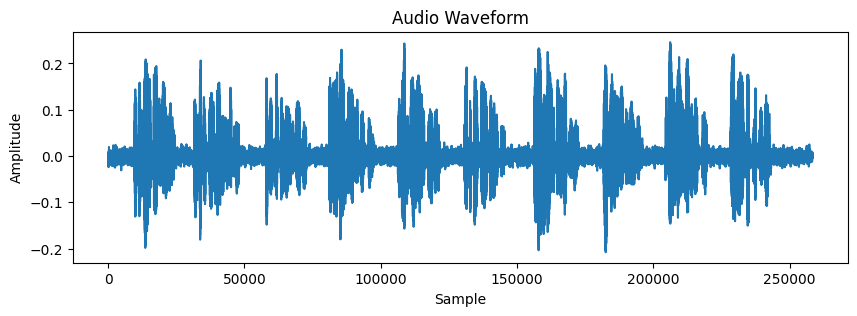

In [10]:
# Import necessary libraries
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
import os
import fasttext
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import torchaudio
import torch
from textblob import TextBlob
import nltk
nltk.download('brown')

# Mount Google Drive
drive.mount('/content/drive')

# Initialize the models

# Initialize the FastText model for language detection
ft_model = fasttext.load_model('lid.176.bin')

# Initialize the wav2vec 2.0 model for speech recognition
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
model.eval()

# Define functions

def recognize_speech_from_file(file_path):
    """Transcribe speech from an audio file using wav2vec 2.0 and return the string."""
    waveform, rate = torchaudio.load(file_path, num_frames=10**7)
    waveform = torchaudio.transforms.Resample(orig_freq=rate, new_freq=16000)(waveform)
    input_values = tokenizer(waveform.squeeze().numpy(), return_tensors="pt").input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.decode(predicted_ids[0])
    return transcription

def detect_language(text):
    """Detect the language of the text using FastText."""
    predictions = ft_model.predict(text)
    lang = predictions[0][0].split('__label__')[-1]
    return lang

def analyze_sentiment(text):
    """Analyze sentiment of the text and return the sentiment."""
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.2:
        return "positive"
    elif analysis.sentiment.polarity < -0.2:
        return "negative"
    else:
        return "neutral"

def detect_language_and_translate(text):
    """Detect the language and inform if not English."""
    detected_lang = detect_language(text)
    if detected_lang != 'en':
        print(f"Note: The detected language is {detected_lang.upper()}. Sentiment analysis might not be as accurate.")
    return text

def extract_keywords(text, n=5):
    """Extract key phrases from the text."""
    blob = TextBlob(text)
    return blob.noun_phrases[:n]

def visualize_audio(file_path):
    """Visualize the audio waveform."""
    waveform, _ = torchaudio.load(file_path)
    plt.figure(figsize=(10, 3))
    plt.plot(waveform.t().numpy())
    plt.title('Audio Waveform')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

# Ask the user to select a file

files = [
    "/content/drive/My Drive/MyData/harvard.wav",
    "/content/drive/My Drive/MyData/sample2eng.wav",
    "/content/drive/My Drive/MyData/sample3fr.wav"
]

print("Please select a file to process:")
for i, file in enumerate(files, 1):
    print(f"{i}. {file.split('/')[-1]}")

try:
    selected_index = int(input("Enter the number corresponding to your file choice: ")) - 1
    if 0 <= selected_index < len(files):
        file_path = files[selected_index]
    else:
        print("Invalid choice!")
        raise ValueError("Invalid file choice")

    # Process the selected .wav file and perform sentiment analysis

    # Recognize speech
    text = recognize_speech_from_file(file_path)

    if text:
        # Language detection
        detected_language = detect_language(text)
        print("\nLanguage Detected:", detected_language.upper())

        # Translation (if needed)
        translated_text = detect_language_and_translate(text)

        # Sentiment analysis
        sentiment = analyze_sentiment(translated_text)

        # Feedback based on sentiment
        if sentiment == "positive":
            feedback = "That sounds positive! Keep up the good vibes."
        elif sentiment == "negative":
            feedback = "That sounds a bit negative. Everything will be alright!"
        else:
            feedback = "That sounds neutral. Tell me more!"

        # Keyword extraction
        keywords = extract_keywords(translated_text)

        # Print results
        print("Recognized Text:", text)
        if text != translated_text:
            print("Translated Text:", translated_text)
        print("Sentiment Detected:", sentiment)
        print("Feedback:", feedback)
        print("Keywords:", ', '.join(keywords))

        # Text-to-Speech synthesis
        tts = gTTS(feedback, lang='en')
        output_path = "/content/drive/My Drive/MyData/feedback_audio_output.wav"
        tts.save(output_path)
        print(f"Feedback audio saved to: {output_path}")

        # Visualize audio
        visualize_audio(file_path)

except Exception as e:
    print(f"An error occurred: {e}")